<a href="https://colab.research.google.com/github/yash-masne/Predictive-Modeling-for-Servo-Motor-Position/blob/main/servo_motor_position_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of Project:** Servo Motor Position Prediction

**Objective:** The objective of this project is to develop a machine learning model to predict the position of a servo motor based on various input features.

**Data Source:** The dataset used in this project is sourced from the file 'servo_data.csv'.

*File :* [Servo Data File Link](https://drive.google.com/file/d/1leb0CnC-Cnel4Sv1JH1YHVCw1kfmQbL6/view?usp=drive_link)

*Data* :
```python
Motor   Screw   Pgain   Vgain   Class
A       B       3       1       4.5
B       C       4       2       5.1
C       D       5       3       6.2
D       E       6       4       7
```


**Import Library:**
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
```

**Import Data:**
```python
df = pd.read_csv('servo_data.csv')  #uploaded file on google colab
```

**Describe Data:**
The dataset contains information about servo motors, including features such as motor type, screw type, and other characteristics.

**Data Visualization:**
Visualizations such as scatter plots can be used to explore relationships between variables and understand the distribution of data.

*Visualization :*

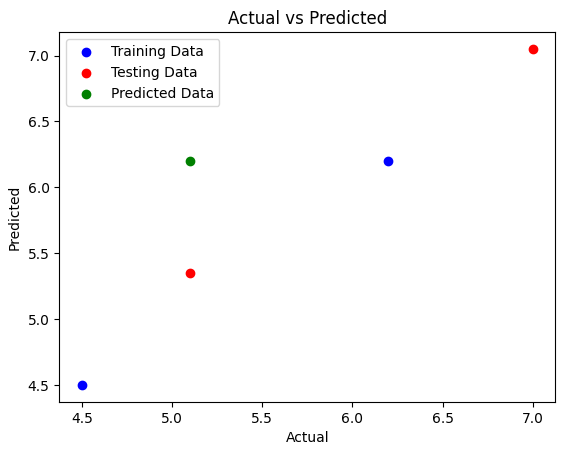

**Data Preprocessing:**
Categorical variables are encoded numerically to prepare the data for modeling.

Define Target Variable (y) and Feature Variables (X):
```python
y = df['Class']
X = df.drop('Class', axis=1)
```

**Train Test Split:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
```

**Modeling:**
A linear regression model is chosen for this project.
```python
lr = LinearRegression()
lr.fit(X_train, y_train)
```

**Model Evaluation:**
```python
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
```
Metrics such as mean squared error, mean absolute error, and R-squared can be used to evaluate the model's performance.

**Prediction:**
```python
new_data = df.sample(1).drop('Class', axis=1)
predicted_position = lr.predict(new_data)
print('Predicted servo position for new data point:', predicted_position)
```

**Explanation:**
This project utilizes a linear regression model to predict the position of a servo motor based on various input features. After importing the necessary libraries and loading the data, categorical variables are encoded, and the dataset is split into training and testing sets. The linear regression model is trained on the training data and evaluated using appropriate metrics. Finally, the model is used to predict the servo position for a new data point.


In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print('Uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(uploaded[filename])))

Saving servo_data.csv to servo_data.csv
Uploaded file "servo_data.csv" with length 81 bytes


In [3]:
import pandas as pd

df = pd.read_csv('servo_data.csv')  # Replace 'filename.csv' with the actual filename

Predicted servo position for new data point: [5.35]


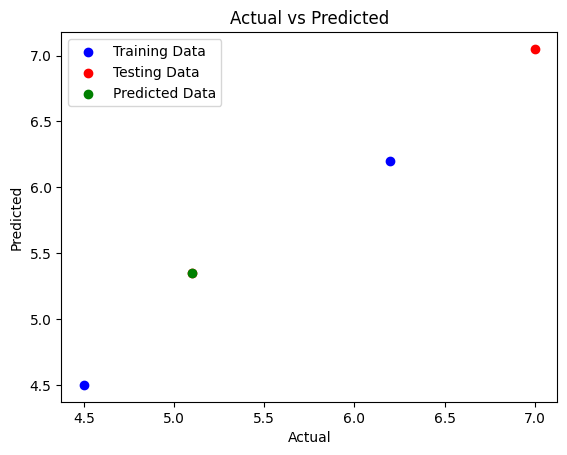

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load data from the uploaded file
df = pd.read_csv('servo_data.csv')  #uploaded file on google colab

# Encode categorical variables if needed
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)

# Define target variable y and feature variables X
y = df['Class']
X = df.drop('Class', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Choose model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)

# Evaluate model
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Predict
new_data = df.sample(1).drop('Class', axis=1)
predicted_position = lr.predict(new_data)
print('Predicted servo position for new data point:', predicted_position)

# Visualize Actual vs Predicted
plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
plt.scatter(y_test, y_pred_test, color='red', label='Testing Data')

# Plot for new data point
plt.scatter([y_test.values[0]], [predicted_position], color='green', label='Predicted Data')  # Use values to extract scalar values
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()